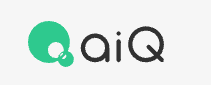

[disclaimer](./disclaimer.txt/)

# How to look up COMPANY ID and tickers for FACTSET Data
This sample show how to achieve the following operation with a simple interface:
- Look up the unique FACTSET instrument ID (FSYM_ID) from a company name
- Look up the unique FACTSET instrument ID from a ticker
- Look up the unique FACTSET instrument ID from Bloomberg ticker and FIGI.
- Look up tickers from FACTSET company IDs

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database / API for Equity Data  ## Import ASR Data Accessor Library (DAL)

In [30]:
from aiq_strategy_robot.data.data_accessor import DAL
handler = DAL('FACTSET')

### Pattern 1: look up FACTSET unique company ID (FSYM_ID) from a company name.

####  **load**
> Load the data to memory  
> Set data_type = 'symbol_lookup' for looking up instrument IDs.

In [33]:
# `data_type` must be 'symbol_lookup'
handler = handler.load(
    data_type='symbol_lookup',
    company_name='Tokyo Electron'
)

#### **Retrieve**
> `Pandas.DataFrame` the loaded data via `retrieve`

In [34]:
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,FSYM_ID,TICKER,EXCHANGE_CODE,CURRENCY,COMPANY_NAME,FIGI,BBG_TICKER,FSYM_PRIMARY_LISTING_ID
0,F05SL2-R,27601-JP,None,None,Tokyo Electron Device Npv Deferred Settlement ...,BBG000BJ47F9,None,F05SL2-R
1,F05SL2-R,27601-JP,TKS,JPY,Tokyo Electron Device Npv Deferred Settlement ...,BBG000BJ47F9,None,None
2,F05SL2-R,27601-JP,TKS,JPY,Tokyo Electron Device Npv Deferred Settlement ...,BBG000BJ47F9,None,S26FBH-L
3,BS0GWP-R,8035-JP,None,None,Tokyo Electron Ltd.,BBG000BB59S7,8035 JP,BS0GWP-R
4,BS0GWP-R,8035-JP,TKS,JPY,Tokyo Electron Ltd.,BBG000BB59S7,8035 JP,None
5,BS0GWP-R,8035-JP,TKS,JPY,Tokyo Electron Ltd.,BBG000BB59S7,8035 JP,VK87BB-L
6,X9W664-R,TKY-DE,STU,EUR,Tokyo Electron Ltd.,BBG000C0K1L7,TKY GR,None
7,X9W664-R,TKY-DE,LASZ,EUR,Tokyo Electron Ltd.,BBG000C0K1L7,TKY GR,None
8,X9W664-R,TKY-DE,QTX,EUR,Tokyo Electron Ltd.,BBG000C0K1L7,TKY GR,None
9,X9W664-R,TKY-DE,BER,EUR,Tokyo Electron Ltd.,BBG000C0K1L7,TKY GR,None


#### Too many results were retrieved.
> The search result can be made shorter by specifying currency_code and/or exchange_code.

In [35]:
# This time currency_code and exchange_code are specified.
# pick_only_primary can be also used to focus on only the main exchange.
handler = handler.load(
    data_type='symbol_lookup',
    company_name='Tokyo Electron',
    currency_code='JPY',
    exchange_code='TKS',
    pick_only_primary=True
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,FSYM_ID,TICKER,EXCHANGE_CODE,CURRENCY,COMPANY_NAME,FIGI,BBG_TICKER,FSYM_PRIMARY_LISTING_ID
0,F05SL2-R,27601-JP,TKS,JPY,Tokyo Electron Device Npv Deferred Settlement ...,BBG000BJ47F9,None,S26FBH-L
1,BS0GWP-R,8035-JP,TKS,JPY,Tokyo Electron Ltd.,BBG000BB59S7,8035 JP,VK87BB-L
2,GGQTN7-R,2760-JP,TKS,JPY,Tokyo Electron Device Limited,BBG000FDZ3B7,2760 JP,QG32RQ-L


### Pattern 2: Look up FSYM_ID from ticker
> If you know the ticker, then it is quicker as in the next example.

In [37]:
handler = handler.load(
    data_type='symbol_lookup',
    ticker='8035-JP',
    currency_code='JPY',
    exchange_code='TKS',
    pick_only_primary=True
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,FSYM_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,BS0GWP-R,8035-JP,Tokyo Electron Ltd.,TKS,JPY,BBG000BB59S7,8035 JP


### Pattern 3: Look up FSYM_ID from Bloomberg FIGI
> Even quicker if you know the bloomberg unique company ID (FIGI).

In [40]:
handler = handler.load(
    data_type='symbol_lookup',
    figi='BBG000BB59S7',
    pick_only_primary=True
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,FSYM_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,BBG_TICKER,FIGI
1,BS0GWP-R,8035-JP,Tokyo Electron Ltd.,TKS,JPY,8035 JP,BBG000BB59S7


### Patter 4: Look up a ticker from an FSYM_ID

In [41]:
# The input argment for FSYM_ID is `factset_id`.
handler = handler.load(
    data_type='symbol_lookup',
    factset_id='BS0GWP-R',
    currency_code='JPY',
    pick_only_primary=True
)
df_symbol = handler.retrieve(transformed=False)
df_symbol.head(20)

,FSYM_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER,FSYM_PRIMARY_LISTING_ID
0,BS0GWP-R,8035-JP,Tokyo Electron Ltd.,TKS,JPY,BBG000BB59S7,8035 JP,VK87BB-L


#### Caution: You can only input only one of company_name, figi, ticker, and factset_id in searching.

In [43]:
# An error is thrown if you input more than one as follows.
handler = handler.load(
    data_type='symbol_lookup',
    company_name='Tokyo Electron',
    ticker='AAPL US',
    pick_only_primary=True
)

ValueError: Please specify only one of the following: FactSet ID, ticker, company name or figi.